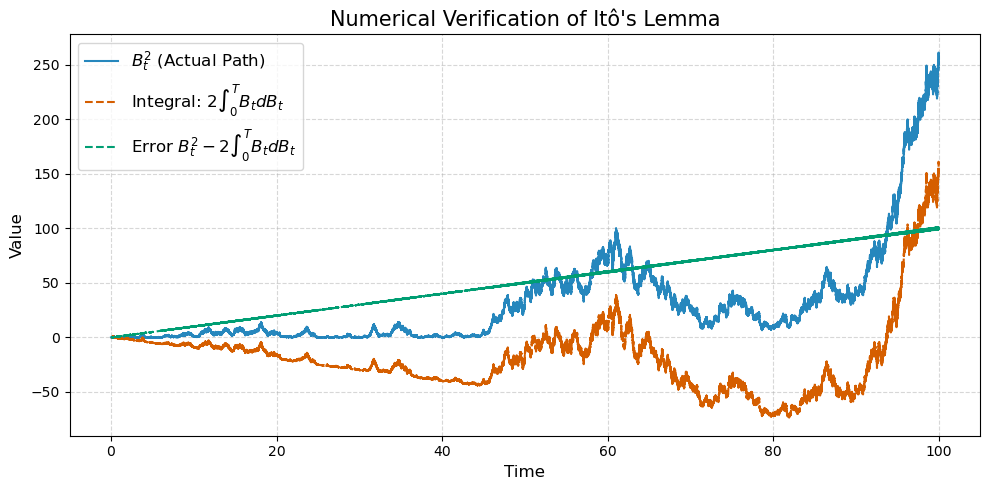

In [11]:
import numpy as np
import matplotlib.pyplot as plt

T = 100.0        
N = 1000000        
dt = T / N       
t = np.linspace(0, T, N)

np.random.seed(42)
dW = np.random.normal(0, np.sqrt(dt), N)
W = np.cumsum(dW)
W = np.insert(W, 0, 0)[:-1]
stochastic_integral = 2 * np.cumsum(W * dW)

plt.figure(figsize=(10, 5))
plt.plot(t, W**2, label='$B_t^2$ (Actual Path)', color='#0072B2', alpha=0.85, linewidth=1.5)
plt.plot(t, stochastic_integral, '--', label=r'Integral: $2\int_0^T B_t dB_t$', color='#D55E00', linewidth=1.5)
plt.plot(t, W**2 - stochastic_integral, '--', label=r'Error $B_t^2 - 2\int_0^T B_t dB_t$', color='#009E73', linewidth=1.5)
plt.title("Numerical Verification of Itô's Lemma", fontsize=15)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

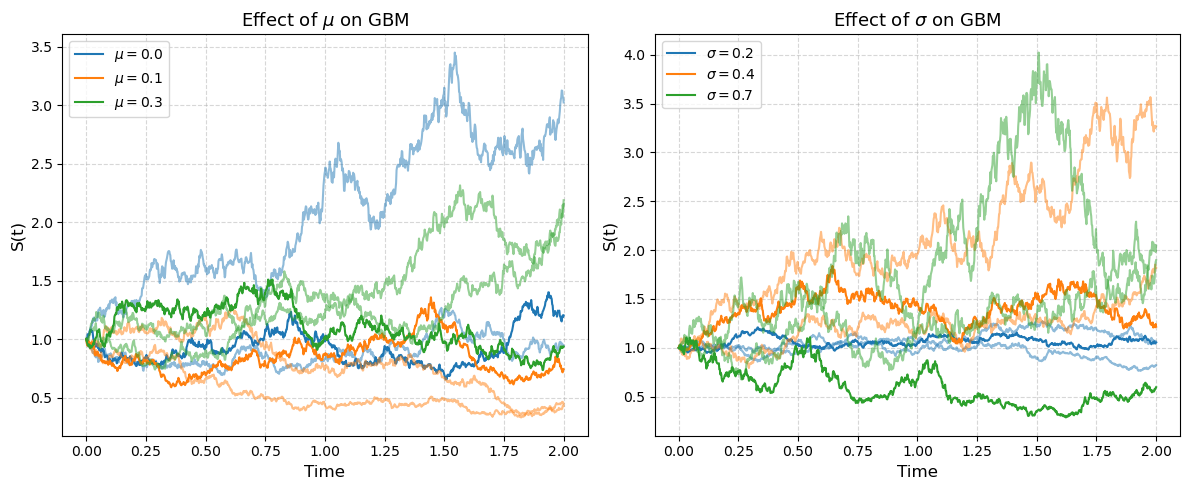

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
T = 2.0
N = 1000
dt = T / N
t = np.linspace(0, T, N+1)
S0 = 1.0
NPATH = 3

np.random.seed(42)

# 不同mu的影响
mu_list = [0.0, 0.1, 0.3]
sigma = 0.4

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for mu in mu_list:
    for i in range(NPATH):
        W = np.cumsum(np.random.normal(0, np.sqrt(dt), N))
        W = np.insert(W, 0, 0)
        S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
        if i == 0:
            plt.plot(t, S, label=fr'$\mu={mu}$', linewidth=1.5)
        else:
            plt.plot(t, S, color=plt.gca().lines[-1].get_color(), alpha=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('S(t)', fontsize=12)
plt.title(r'Effect of $\mu$ on GBM', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# 不同sigma的影响
sigma_list = [0.2, 0.4, 0.7]
mu = 0.1

plt.subplot(1, 2, 2)
for sigma in sigma_list:
    for i in range(NPATH):
        W = np.cumsum(np.random.normal(0, np.sqrt(dt), N))
        W = np.insert(W, 0, 0)
        S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
        if i == 0:
            plt.plot(t, S, label=fr'$\sigma={sigma}$', linewidth=1.5)
        else:
            plt.plot(t, S, color=plt.gca().lines[-1].get_color(), alpha=0.5)
plt.xlabel('Time', fontsize=12)
plt.ylabel('S(t)', fontsize=12)
plt.title(r'Effect of $\sigma$ on GBM', fontsize=13)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

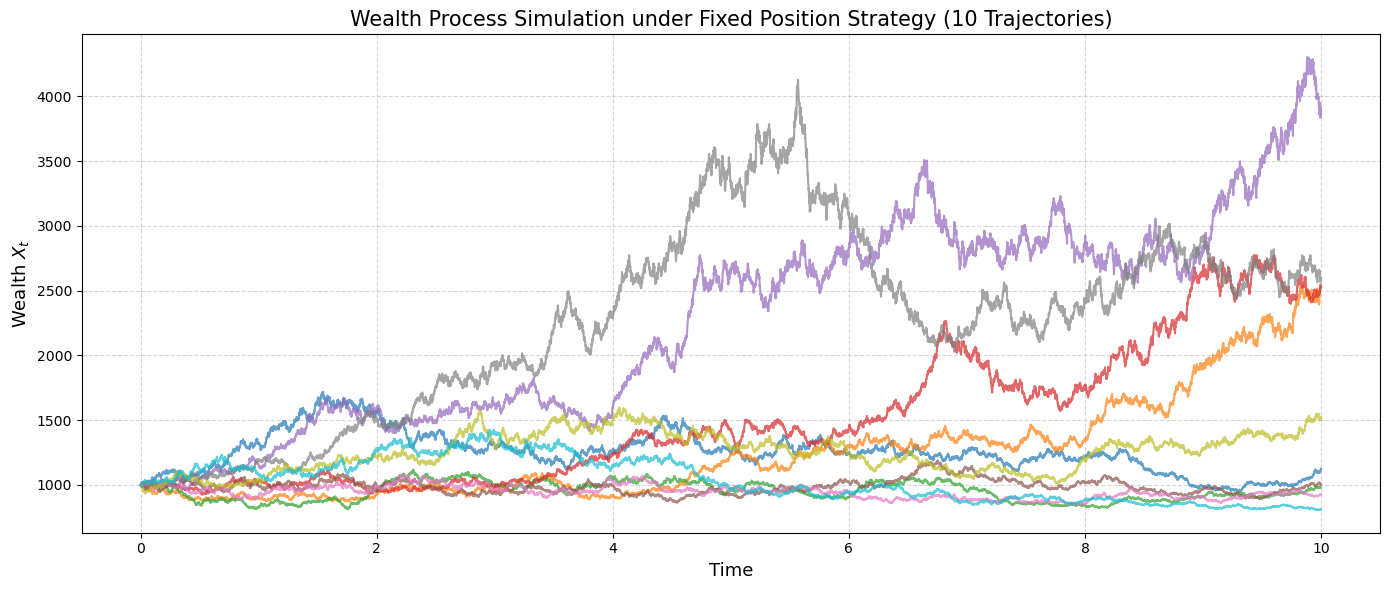

In [15]:
import numpy as np
import matplotlib.pyplot as plt

S0 = 50
X0 = 1000
Delta = 10
mu = 0.08
sigma = 0.25
r = 0.03
T = 10.0
N = 10000
dt = T / N
NPATH = 10  # Number of trajectories

t_axis = np.linspace(0, T, N+1)
plt.figure(figsize=(14, 6))

for path in range(NPATH):
    S = np.zeros(N+1)
    X = np.zeros(N+1)
    S[0], X[0] = S0, X0
    for i in range(N):
        dB = np.random.normal(0, np.sqrt(dt))
        S[i+1] = S[i] + mu * S[i] * dt + sigma * S[i] * dB
        drift_part = r * X[i] * dt + Delta * (mu - r) * S[i] * dt
        diffusion_part = Delta * sigma * S[i] * dB
        X[i+1] = X[i] + drift_part + diffusion_part
    plt.plot(t_axis, X, alpha=0.7, label=f'Track {path+1}' if path < 2 else None)  # Only show legend for first two tracks

plt.title("Wealth Process Simulation under Fixed Position Strategy (10 Trajectories)", fontsize=15)
plt.xlabel("Time", fontsize=13)
plt.ylabel("Wealth $X_t$", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

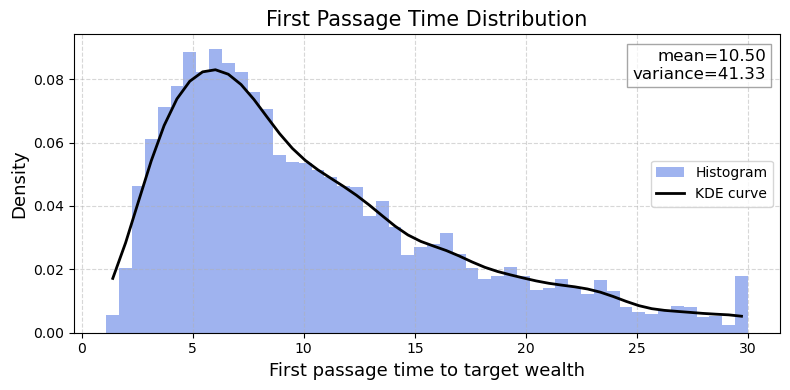

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.ndimage import gaussian_filter1d

# Parameters
X0 = 1000
S0 = 50
Delta = 10
mu = 0.08
sigma = 0.25
r = 0.03
X_target = 2000
T = 30
dt = 0.01
N = int(T / dt)
n_paths = 5000

first_passage_times = []

for _ in range(n_paths):
    X = X0
    S = S0
    t = 0
    for i in range(N):
        dB = np.random.normal(0, np.sqrt(dt))
        S += mu * S * dt + sigma * S * dB
        X += r * X * dt + Delta * (mu - r) * S * dt + Delta * sigma * S * dB
        t += dt
        if X >= X_target:
            first_passage_times.append(t)
            break
    else:
        first_passage_times.append(T)

first_passage_times = np.array(first_passage_times)

# Plot histogram and KDE curve for first passage times
plt.figure(figsize=(8, 4))
bins = 50
counts, bin_edges, _ = plt.hist(first_passage_times, bins=bins, density=True, alpha=0.5, color='royalblue', label='Histogram')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
kde = gaussian_kde(first_passage_times)
plt.plot(bin_centers, kde(bin_centers), color='black', linewidth=2, label='KDE curve')
mean_val = first_passage_times.mean()
std_val = first_passage_times.std()
plt.text(0.98, 0.95, f'mean={mean_val:.2f}\nvariance={std_val**2:.2f}',
         transform=plt.gca().transAxes, fontsize=12, color='black',
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.xlabel('First passage time to target wealth', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('First Passage Time Distribution', fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

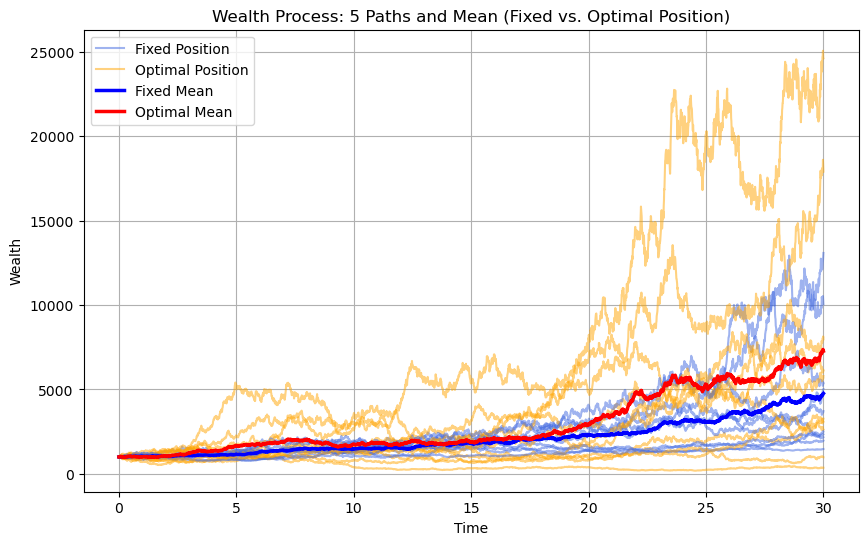

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
X = 1000
S = 50
Delta = 10
mu = 0.08
sigma = 0.25
r = 0.03
T = 30
dt = 0.01
N = int(T / dt)
n_paths = 10

# pi_star position ratio
pi_star = (mu - r) / (sigma ** 2)

t_axis = np.linspace(0, T, N+1)

# Store all paths
X0_paths = []
X1_paths = []

for path in range(n_paths):
    # Fixed position
    S0 = np.zeros(N+1)
    X0 = np.zeros(N+1)
    S0[0], X0[0] = S, X
    for i in range(N):
        dB = np.random.normal(0, np.sqrt(dt))
        S0[i+1] = S0[i] + mu * S0[i] * dt + sigma * S0[i] * dB
        drift_part = r * X0[i] * dt + Delta * (mu - r) * S0[i] * dt
        diffusion_part = Delta * sigma * S0[i] * dB
        X0[i+1] = X0[i] + drift_part + diffusion_part
    X0_paths.append(X0)

    # Optimal position
    S1 = np.zeros(N+1)
    X1 = np.zeros(N+1)
    S1[0], X1[0] = S, X
    for i in range(N):
        dB = np.random.normal(0, np.sqrt(dt))
        S1[i+1] = S1[i] + mu * S1[i] * dt + sigma * S1[i] * dB
        delta_dynamic = pi_star * X1[i] / S1[i]
        drift_part = r * X1[i] * dt + delta_dynamic * (mu - r) * S1[i] * dt
        diffusion_part = delta_dynamic * sigma * S1[i] * dB
        X1[i+1] = X1[i] + drift_part + diffusion_part
    X1_paths.append(X1)

X0_paths = np.array(X0_paths)
X1_paths = np.array(X1_paths)

# Calculate mean
X0_mean = X0_paths.mean(axis=0)
X1_mean = X1_paths.mean(axis=0)

# Plot
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t_axis, X0_paths[i], color='royalblue', alpha=0.5, label='Fixed Position' if i == 0 else "")
    plt.plot(t_axis, X1_paths[i], color='orange', alpha=0.5, label='Optimal Position' if i == 0 else "")
plt.plot(t_axis, X0_mean, color='blue', linewidth=2.5, label='Fixed Mean')
plt.plot(t_axis, X1_mean, color='red', linewidth=2.5, label='Optimal Mean')
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.title('Wealth Process: 5 Paths and Mean (Fixed vs. Optimal Position)')
plt.legend()
plt.grid(True)
plt.show()

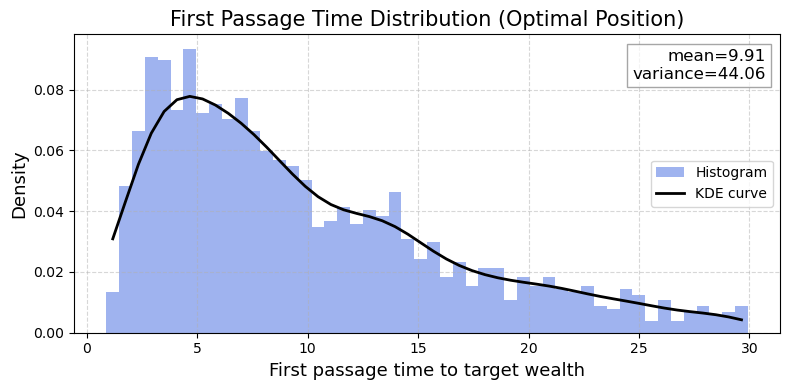

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Parameters
X0 = 1000
S0 = 50
mu = 0.08
sigma = 0.25
r = 0.03
X_target = 2000
T = 30
dt = 0.01
N = int(T / dt)
n_paths = 2000

# pi_star position ratio
pi_star = (mu - r) / (sigma ** 2)

first_passage_times = []

for _ in range(n_paths):
    X = X0
    S = S0
    t = 0
    for i in range(N):
        dB = np.random.normal(0, np.sqrt(dt))
        S += mu * S * dt + sigma * S * dB
        delta_dynamic = pi_star * X / S
        X += r * X * dt + delta_dynamic * (mu - r) * S * dt + delta_dynamic * sigma * S * dB
        t += dt
        if X >= X_target:
            first_passage_times.append(t)
            break

first_passage_times = np.array(first_passage_times)

# Plot histogram and KDE curve for first passage times
plt.figure(figsize=(8, 4))
bins = 50
counts, bin_edges, _ = plt.hist(first_passage_times, bins=bins, density=True, alpha=0.5, color='royalblue', label='Histogram')
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
kde = gaussian_kde(first_passage_times)
plt.plot(bin_centers, kde(bin_centers), color='black', linewidth=2, label='KDE curve')
mean_val = first_passage_times.mean()
std_val = first_passage_times.std()
plt.text(0.98, 0.95, f'mean={mean_val:.2f}\nvariance={std_val**2:.2f}',
         transform=plt.gca().transAxes, fontsize=12, color='black',
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))
plt.xlabel('First passage time to target wealth', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.title('First Passage Time Distribution (Optimal Position)', fontsize=15)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


